## Day 3 - EDA
### Exploratory data analysis
##### Activity 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
#create dataframes with numerical
df_num = df[df.select_dtypes(include=[np.number]).columns]
num_cols = df_num.columns.drop("total_claim_amount")

#and categorical data only
df_cat = df[df.select_dtypes(include=[object]).columns]
cat_cols = df_cat.columns

In [4]:
df_cat = df_cat.drop("effective_to_date", axis=1)

Template for plotting with seaborn:

```import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = sns.load_dataset('tips')

# Create the plot
sns.distplot(df['total_bill'])

# Add labels and title
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bill')

# Show the plot
plt.show()
```

You can customize the visualizations in many ways, for example you can add error bars, change the color, change the style and many more.


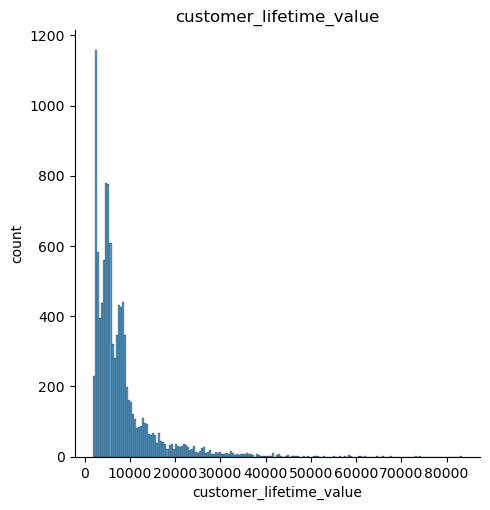

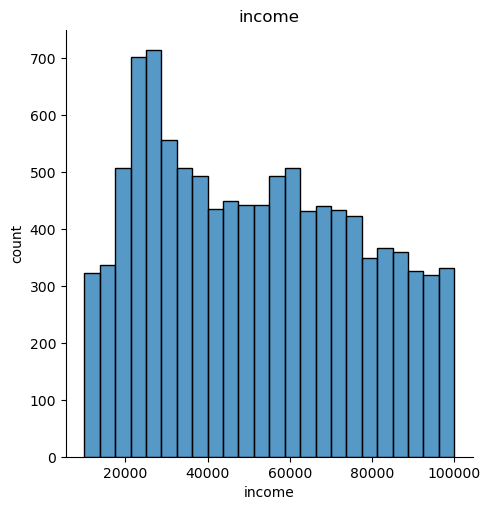

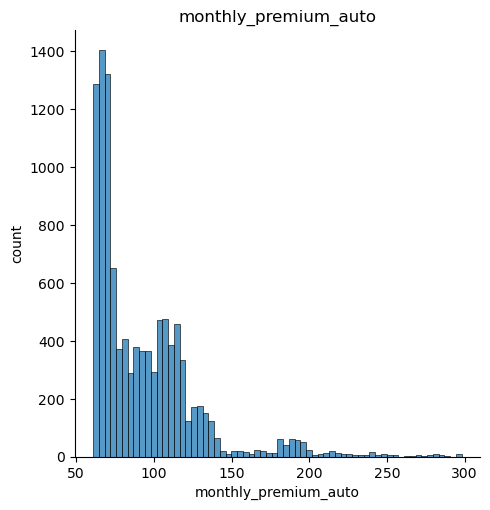

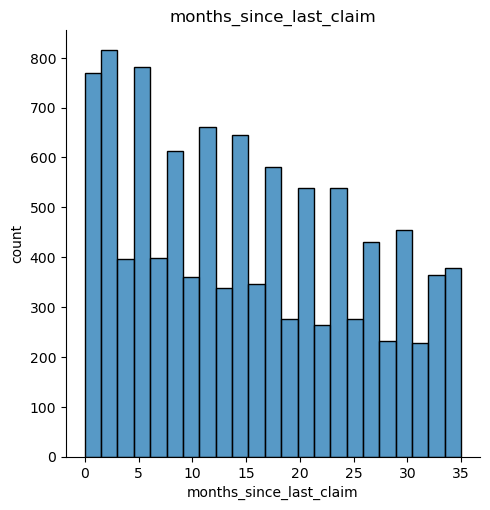

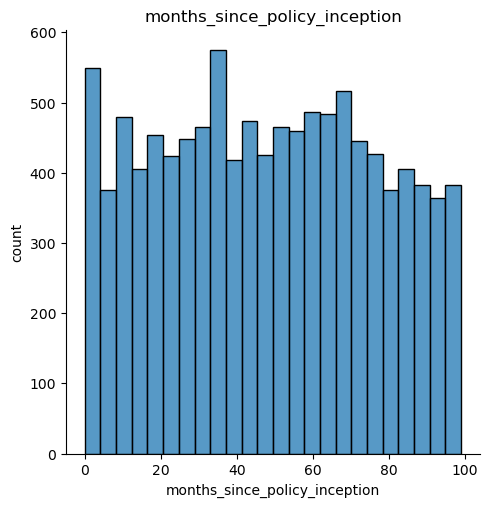

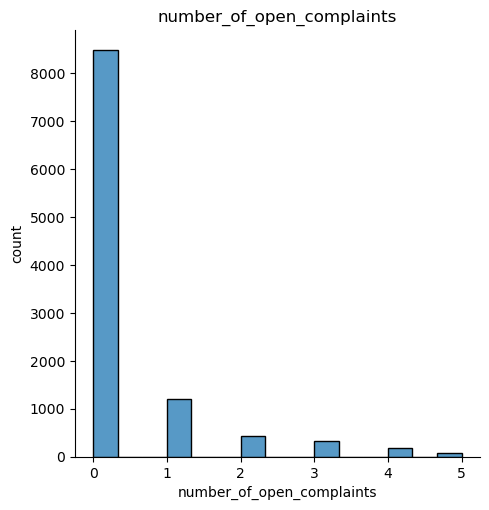

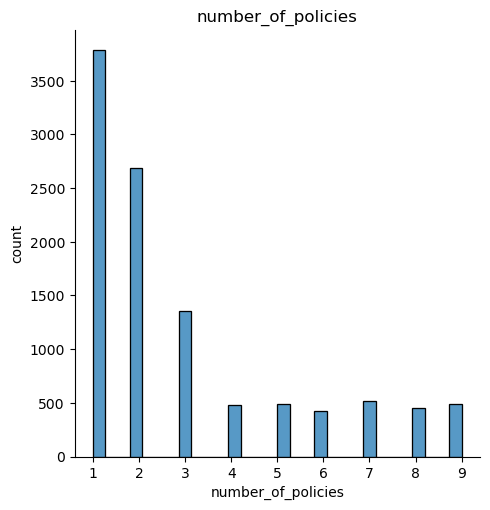

In [6]:
# for loop loops over all the columns of the numerical dataset to create histograms for all columns
for col in num_cols:
    sns.displot(df_num[col])

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(col)

    # Show the plot
    plt.show()

In [7]:
num_cols.unique()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [9]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


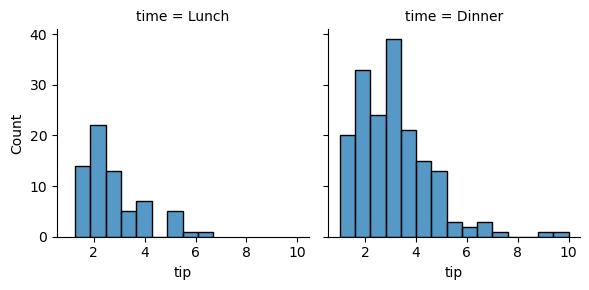

In [26]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

In [23]:
g = sns.FacetGrid(df_num, col="customer_lifetime_value")
g.map(sns.histplot, "value")

KeyboardInterrupt: 

ValueError: Image size of 1702800x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.7028e+06x300 with 1795 Axes>

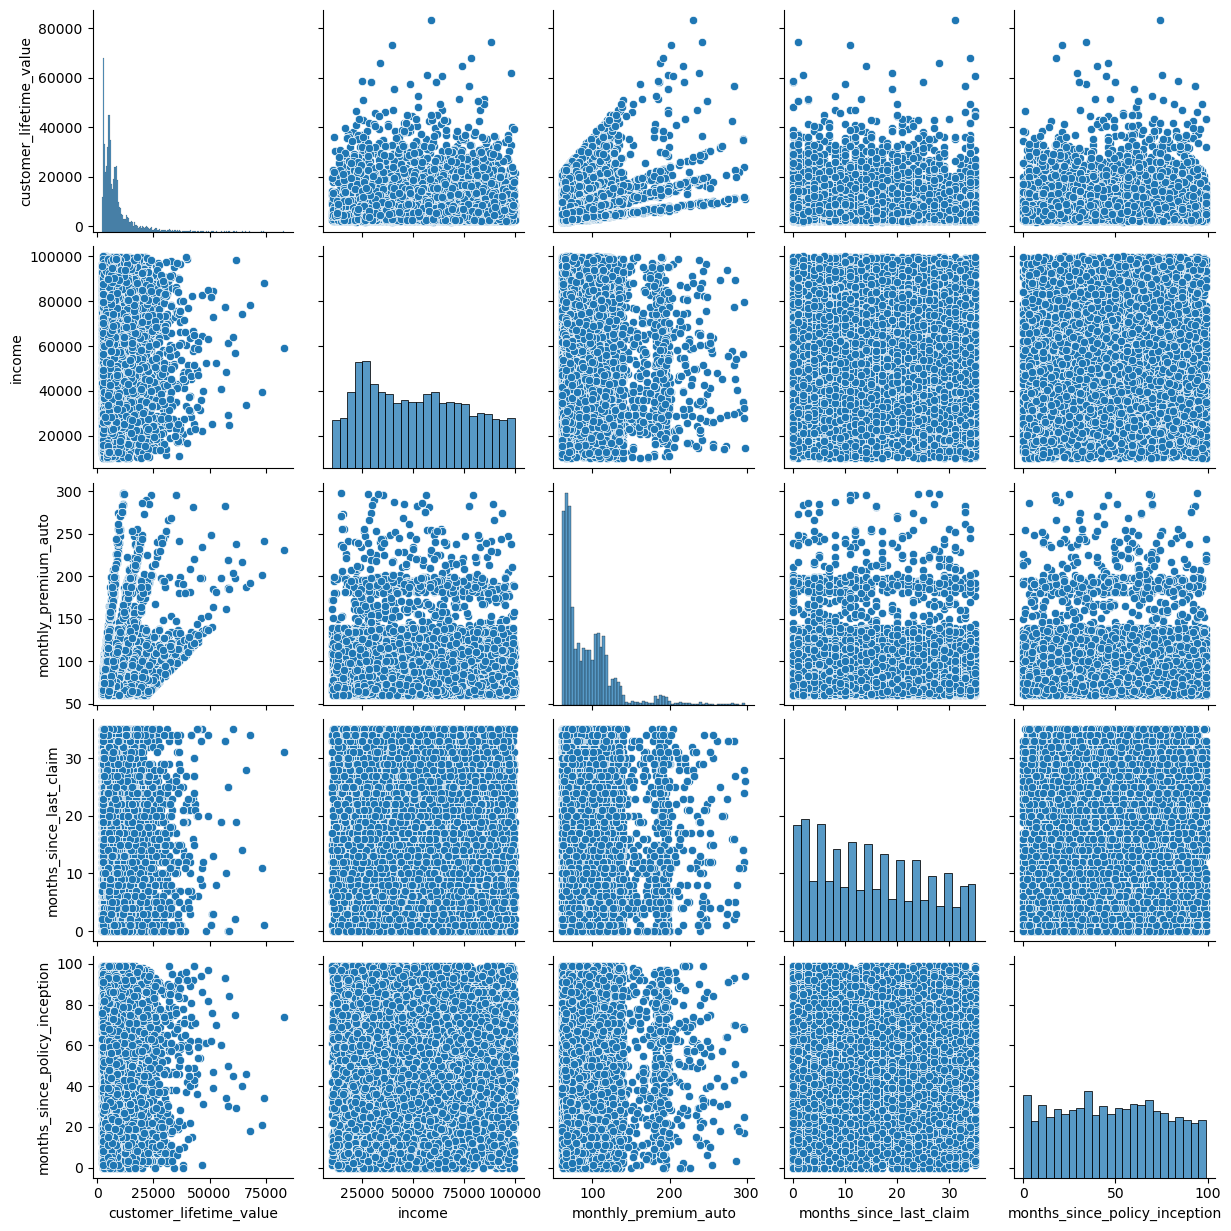

In [20]:
#change the palette used by seaborn plots 
sns.color_palette("flare", as_cmap=True)

#create a pairplot which plots each variable against all others in scatterplots
sns.pairplot(df_num[num_cols.drop(["number_of_open_complaints","number_of_policies"])])

<AxesSubplot:>

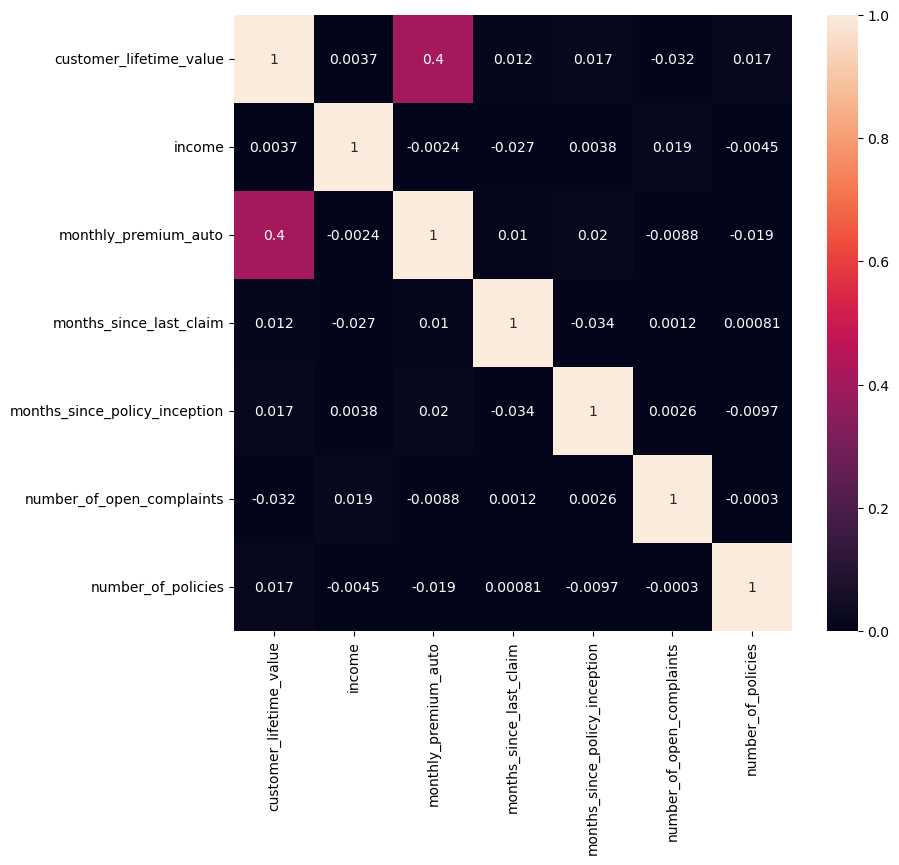

In [17]:
plt.figure(figsize=(9,8))

corr = df_num[num_cols].corr()
sns.heatmap(corr,vmin=0,vmax=1,annot=True)